In [1]:
import pandas as pd

In [2]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [3]:
hr_df.head(4)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low

In [4]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Satisfaction Level Vs Left

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

In [13]:
left = hr_df[hr_df.left == 1]
not_left = hr_df[hr_df.left == 0]

/Users/manaranjan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


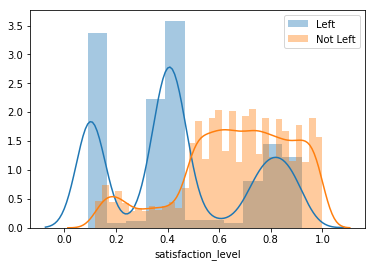

In [14]:
sn.distplot( left['satisfaction_level'], label = 'Left')
sn.distplot( not_left['satisfaction_level'], label = 'Not Left')
plt.legend();

### Last Evaluation Vs Left

/Users/manaranjan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


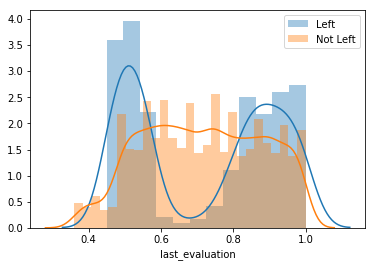

In [15]:
sn.distplot( left['last_evaluation'], label = 'Left')
sn.distplot( not_left['last_evaluation'], label = 'Not Left')
plt.legend();

In [ ]:
hr_df.salary.unique()

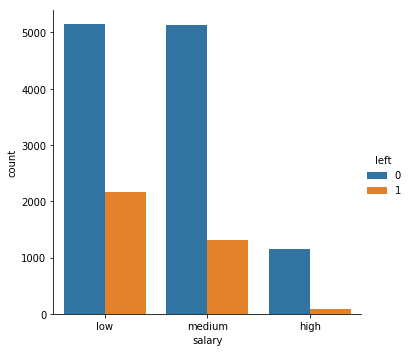

In [16]:
sn.catplot( data = hr_df,
            x = 'salary',
            hue = 'left',
            kind = 'count' );

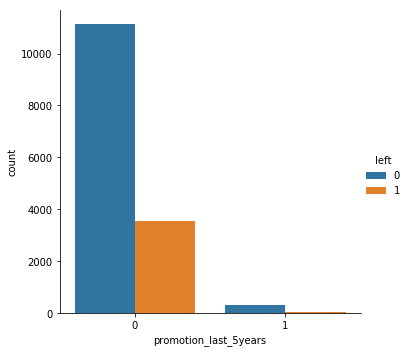

In [17]:
sn.catplot( data = hr_df,
            x = 'promotion_last_5years',
            hue = 'left',
            kind = 'count' );

### Time Spend Company Vs Left

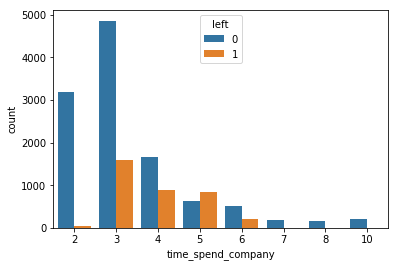

In [18]:
sn.countplot( data = hr_df,
              x = 'time_spend_company',
              hue = 'left' );

In [19]:
pd.crosstab( hr_df.time_spend_company, 
             hr_df.left,
             normalize = 'index')

left                       0         1
time_spend_company                    
2                   0.983662  0.016338
3                   0.753841  0.246159
4                   0.651936  0.348064
5                   0.434487  0.565513
6                   0.708914  0.291086
7                   1.000000  0.000000
8                   1.000000  0.000000
10                  1.000000  0.000000

In [20]:
hr_df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [21]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Encoding Categorical Features

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [22]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['sales', 'salary'] )

In [24]:
hr_encoded_df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales_IT  \
0                   3              0     1                      0         0   
1                   6              0     1                      0         0   
2                   4              0     1                      0         0   
3                   5              0     1                      0         0   
4                   3              0     1                      0         0   

   sales_RandD      ...        sales_hr  sales_management  sales_marketing  \
0            0      ...               0                 0                0   
1            0      ...               0                 0                0   
2            0      ...               0                 0                0   
3            0      ...               0                 0                0   
4            0      ...               0                 0                0   

   sales_product_mng  sales_sales  sales_support  sales_technical  \
0                  0            1              0                0   
1                  0            1              0                0   
2                  0            1              0                0   
3                  0            1              0                0   
4                  0            1              0                0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0  

[5 rows x 21 columns]

### Setting X and Y Variables

In [25]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [28]:
X_features = list(hr_encoded_df.columns)

In [29]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales_IT',
 'sales_RandD',
 'sales_accounting',
 'sales_hr',
 'sales_management',
 'sales_marketing',
 'sales_product_mng',
 'sales_sales',
 'sales_support',
 'sales_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [30]:
X_features.remove('left')

In [31]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [32]:
X[0:2]

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  promotion_last_5years  sales_IT  \
0                   3              0                      0         0   
1                   6              0                      0         0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \
0            0                 0         0                 0                0   
1            0                 0         0                 0                0   

   sales_product_mng  sales_sales  sales_support  sales_technical  \
0                  0            1              0                0   
1                  0            1              0                0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1

In [33]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [35]:
from sklearn.model_selection import train_test_split

/Users/manaranjan/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [36]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [37]:
X_train.shape

(11999, 20)

In [38]:
X_test.shape

(3000, 20)

### Build a Model: V1

Logistic Regression Model - Sigmoid function

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logreg_v1 = LogisticRegression()

In [41]:
logreg_v1.fit( X_train, y_train )

/Users/manaranjan/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
logreg_v1.intercept_

array([-0.42143595])

In [43]:
logreg_v1.coef_

array([[-3.95885972,  0.71004683, -0.29473501,  0.00446403,  0.26645583,
        -1.50873427, -1.27783392, -0.11072187, -0.4936364 ,  0.13026164,
         0.32806505, -0.42339866,  0.02121058, -0.09448163,  0.0286274 ,
         0.07414746,  0.11849046, -1.20286744,  0.66494485,  0.11648663]])

In [45]:
dict( zip( X_features, logreg_v1.coef_[0] ) )

{'Work_accident': -1.508734273096717,
 'average_montly_hours': 0.004464034762513851,
 'last_evaluation': 0.710046825488325,
 'number_project': -0.29473501462303664,
 'promotion_last_5years': -1.2778339156993623,
 'salary_high': -1.2028674381193374,
 'salary_low': 0.6649448521102865,
 'salary_medium': 0.116486632824221,
 'sales_IT': -0.1107218699170514,
 'sales_RandD': -0.4936363958512083,
 'sales_accounting': 0.13026164156555045,
 'sales_hr': 0.3280650482459636,
 'sales_management': -0.4233986585861296,
 'sales_marketing': 0.02121058111692426,
 'sales_product_mng': -0.0944816278092346,
 'sales_sales': 0.028627403650365722,
 'sales_support': 0.07414746460577407,
 'sales_technical': 0.11849045979417376,
 'satisfaction_level': -3.9588597214520016,
 'time_spend_company': 0.26645582988106414}

### Predict on Test Set

- p(y) >= 0.5,  y = 1
- p(y) < 0.5, y = 0

In [47]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [48]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [50]:
y_logreg_v1[0:10]

actual  predicted
10155       0          0
11688       0          0
12598       1          0
12192       1          0
8678        0          1
8217        0          0
4670        0          0
12086       1          1
5235        0          0
4189        0          0

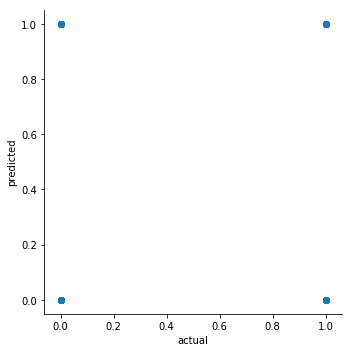

In [66]:
sn.lmplot( data = y_logreg_v1,
          x = 'actual', 
          y = 'predicted',
          fit_reg = False)

### Evaluating the model

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm_v1 = confusion_matrix( y_logreg_v1.actual, 
                          y_logreg_v1.predicted,
                          [1,0] )

In [54]:
cm_v1

array([[ 253,  497],
       [ 147, 2103]])

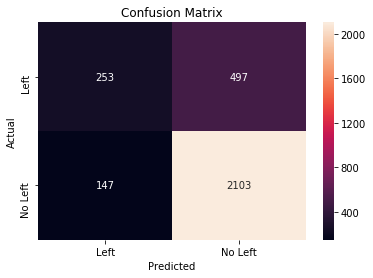

In [55]:
sn.heatmap( cm_v1, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [57]:
(253/(253+497)) # Recall

0.3373333333333333

In [58]:
(253/(253+147)) # Precision

0.6325

In [59]:
from sklearn.metrics import classification_report

In [60]:
print( classification_report( y_logreg_v1.actual,
                              y_logreg_v1.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.63      0.34      0.44       750

   micro avg       0.79      0.79      0.79      3000
   macro avg       0.72      0.64      0.65      3000
weighted avg       0.76      0.79      0.76      3000



### Building a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )
### Max Depth is called hyperparameter

In [ ]:
tree_v2.fit( X_train, y_train )

In [ ]:
y_tree_pred = tree_v2.predict( X_test )

In [ ]:
cm_tree_v2 = confusion_matrix( y_test,
                               y_tree_pred,
                               [1,0] )

In [ ]:
sn.heatmap( cm_tree_v2, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [ ]:
print( classification_report( y_test,
                       y_tree_pred ) )

### Visualizing Decision Tree

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz( tree_v2,
                 out_file = 'tree.model',
                 feature_names = X_features,
                 class_names = ['No Left', 'Left'],
                 filled = True )

import pydotplus as pdot

tree_graph = pdot.graph_from_dot_file( 'tree.model' )

tree_graph.write_jpeg( "tree.jpeg" )

from IPython import display

display.Image( "tree.jpeg" )

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
DecisionTreeClassifier?

In [ ]:
params = { "max_depth": range(3,10),
           "criterion": ['gini', 'entropy'] }

In [ ]:
grid_v3 = GridSearchCV( DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 10,
                        scoring = 'f1' )

In [ ]:
grid_v3.fit( X_train, y_train )

In [ ]:
grid_v3.best_params_

In [ ]:
grid_v3.best_score_

In [ ]:
grid_v3.best_estimator_